# Convolutional Neural Network (CNN)

In this note book I have built a CNN and trained it using the CIFAR10 dataset.(https://www.cs.toronto.edu/~kriz/cifar.html)



Files already downloaded and verified
Files already downloaded and verified


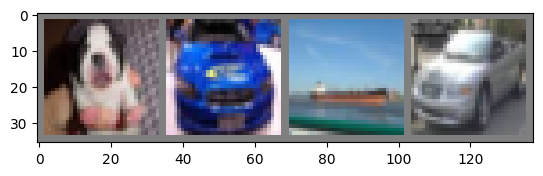

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper Parameters
num_epochs = 0
batch_size = 4
learning_rate = 0.001

# Dataset has PILImage images of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                           shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 
           'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Get random training images
images, labels = next(iter(train_loader))

# Show images
imshow(torchvision.utils.make_grid(images))

conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
pool = nn.MaxPool2d(kernel_size=2, stride=2)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper Parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# Dataset has PILImage images of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                           shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 
           'frog', 'horse', 'ship', 'truck')

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(16*5*5, 120) # 16x5x5 
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5) # flatten tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss() # Multi-class classification so use Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024 || [batch_size, no_channels, image_height, image_width]
        # input_layer: 3 input channels, 6 output channels 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(f'Epoch: [{epoch+1}/{num_epochs}] Step: [{i+1}/{n_total_steps}] Loss: [{loss.item()}]')
            print()

print('Finished training')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value, index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples

    print(f'Accuracy of network [{acc}]')
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]} [{acc}]')
            

            
            








Files already downloaded and verified
Files already downloaded and verified
Epoch: [1/4] Step: [2000/12500] Loss: [2.28779935836792]

Epoch: [1/4] Step: [4000/12500] Loss: [2.2780356407165527]

Epoch: [1/4] Step: [6000/12500] Loss: [2.2922720909118652]

Epoch: [1/4] Step: [8000/12500] Loss: [2.287437915802002]

Epoch: [1/4] Step: [10000/12500] Loss: [2.2634458541870117]

Epoch: [1/4] Step: [12000/12500] Loss: [2.2952206134796143]

Epoch: [2/4] Step: [2000/12500] Loss: [2.2092535495758057]

Epoch: [2/4] Step: [4000/12500] Loss: [1.4987664222717285]

Epoch: [2/4] Step: [6000/12500] Loss: [2.078281879425049]

Epoch: [2/4] Step: [8000/12500] Loss: [1.466141700744629]

Epoch: [2/4] Step: [10000/12500] Loss: [2.464691638946533]

Epoch: [2/4] Step: [12000/12500] Loss: [1.3291770219802856]

Epoch: [3/4] Step: [2000/12500] Loss: [1.1270548105239868]

Epoch: [3/4] Step: [4000/12500] Loss: [1.8863434791564941]

Epoch: [3/4] Step: [6000/12500] Loss: [1.7437266111373901]

Epoch: [3/4] Step: [8000/1